In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import json
from pandas.io.json import json_normalize
from datetime import datetime
from sklearn import preprocessing

In [2]:
df = pd.read_csv("PromoData2017.csv")

In [3]:
df.head()

,Customer ID,Gender,Age,Discount,JanuarySpend,DecSpend
0,4,Female,50,55,890.694435,136.687048
1,6,Female,49,5,120.579431,762.218427
2,7,Female,41,0,397.038695,740.697250
3,9,Male,45,0,811.224296,558.345793
4,11,Female,28,60,-245.993557,683.435239


(array([  2.,   2.,   1., 558., 398., 633., 558.,  78.,  78., 101.]),
 array([-641.2334611 , -418.46263999, -195.69181888,   27.07900223,
         249.84982334,  472.62064445,  695.39146556,  918.16228667,
        1140.93310778, 1363.70392889, 1586.47475   ]),
 <a list of 10 Patch objects>)

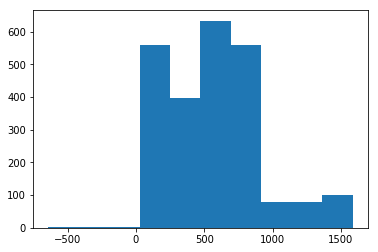

In [4]:
plt.hist(df['DecSpend'])

(array([  7.,  22.,  29., 444., 876., 600., 339.,  49.,  20.,  23.]),
 array([-839.1358833 , -565.26802127, -291.40015924,  -17.53229721,
         256.33556482,  530.20342685,  804.07128888, 1077.93915091,
        1351.80701294, 1625.67487497, 1899.542737  ]),
 <a list of 10 Patch objects>)

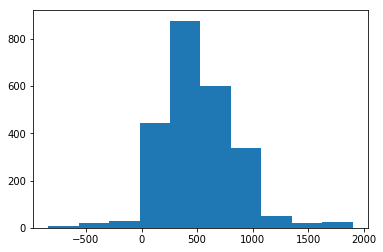

In [5]:
plt.hist(df['JanuarySpend'])

(array([1302.,   96.,  102.,   99.,   99.,  192.,   99.,  141.,   93.,
         186.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <a list of 10 Patch objects>)

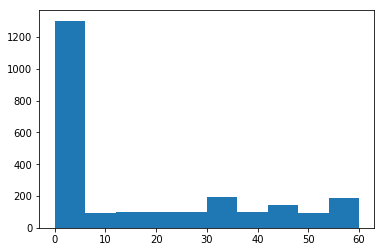

In [6]:
plt.hist(df['Discount'])

(array([455., 462., 460., 215., 225., 266., 235.,  85.,   0.,   6.]),
 array([15. , 19.8, 24.6, 29.4, 34.2, 39. , 43.8, 48.6, 53.4, 58.2, 63. ]),
 <a list of 10 Patch objects>)

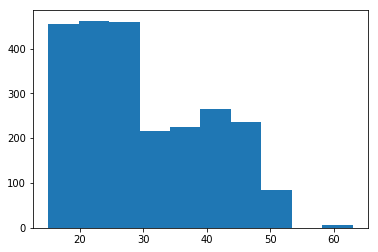

In [7]:
plt.hist(df['Age'])

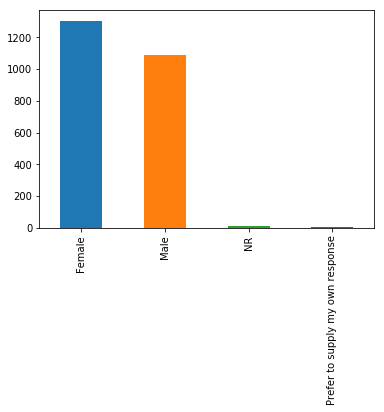

In [8]:
df['Gender'].value_counts().plot(kind='bar')

In [9]:
df['Customer ID'].value_counts()

2047    1
1256    1
1252    1
1250    1
1248    1
1246    1
1244    1
1242    1
1240    1
1238    1
1236    1
1234    1
1232    1
1230    1
1228    1
1226    1
1224    1
1254    1
1258    1
1220    1
1260    1
1290    1
1288    1
1286    1
1284    1
1282    1
1280    1
1278    1
1276    1
1274    1
       ..
415     1
413     1
411     1
409     1
407     1
405     1
403     1
401     1
399     1
397     1
395     1
425     1
427     1
429     1
447     1
459     1
457     1
455     1
453     1
451     1
449     1
445     1
431     1
443     1
441     1
439     1
437     1
435     1
433     1
2049    1
Name: Customer ID, Length: 2409, dtype: int64

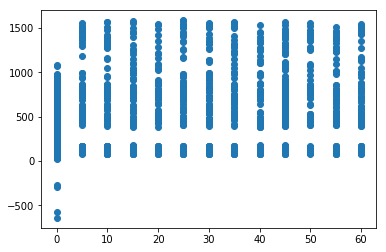

In [23]:
plt.scatter(df["Discount"],df["DecSpend"])

In [12]:
import scipy

scipy.stats.ttest_ind(df['JanuarySpend'], df['DecSpend'])

#result: no significance

Ttest_indResult(statistic=-5.2374290740710965, pvalue=1.6976431562233368e-07)

C:\Users\Michelle\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Coefficients: 
 [0.59950061]
Mean squared error: 129121.07
Variance score: -0.17


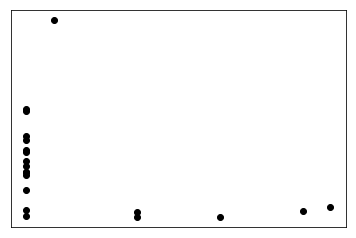

In [22]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

df.sort_values('Discount')

disc_train = df["Discount"].reshape(-1,1)


# Split the data into training/testing sets
Disc_train = disc_train[:-20]
Disc_test = disc_train[-20:]

# Split the targets into training/testing sets
DecSpend_train = df['DecSpend'][:-20]
DecSpend_test = df['DecSpend'][-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(Disc_train, DecSpend_train)

# Make predictions using the testing set
DecSpend_pred = regr.predict(Disc_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(DecSpend_test, DecSpend_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(DecSpend_test, DecSpend_pred))

# Plot outputs
plt.scatter(Disc_test, DecSpend_test,  color='black')
#plt.plot(Disc_test, DecSpend_test, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()